In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
%matplotlib inline
sns.set_style("whitegrid")


In [31]:
try:
    df_train = pd.read_csv("../data/train.csv")
    print("Dataset loaded successfully.")

except FileNotFoundError:
    print("Error: train.csv not found. Make sure it's in the data folder.")

Dataset loaded successfully.


In [32]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


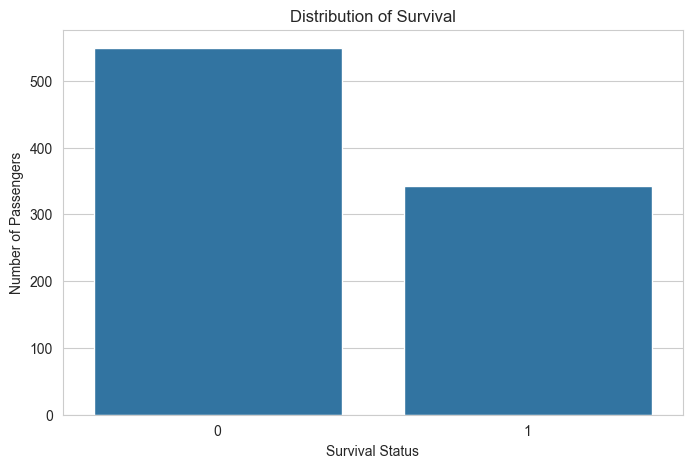

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [35]:
plt.figure(figsize=(8,5))
sns.countplot(x='Survived', data =df_train)
plt.title("Distribution of Survival")
plt.xlabel('Survival Status')
plt.ylabel('Number of Passengers')
plt.show()

#Print the exact numbers
print(df_train['Survived'].value_counts(normalize=True))

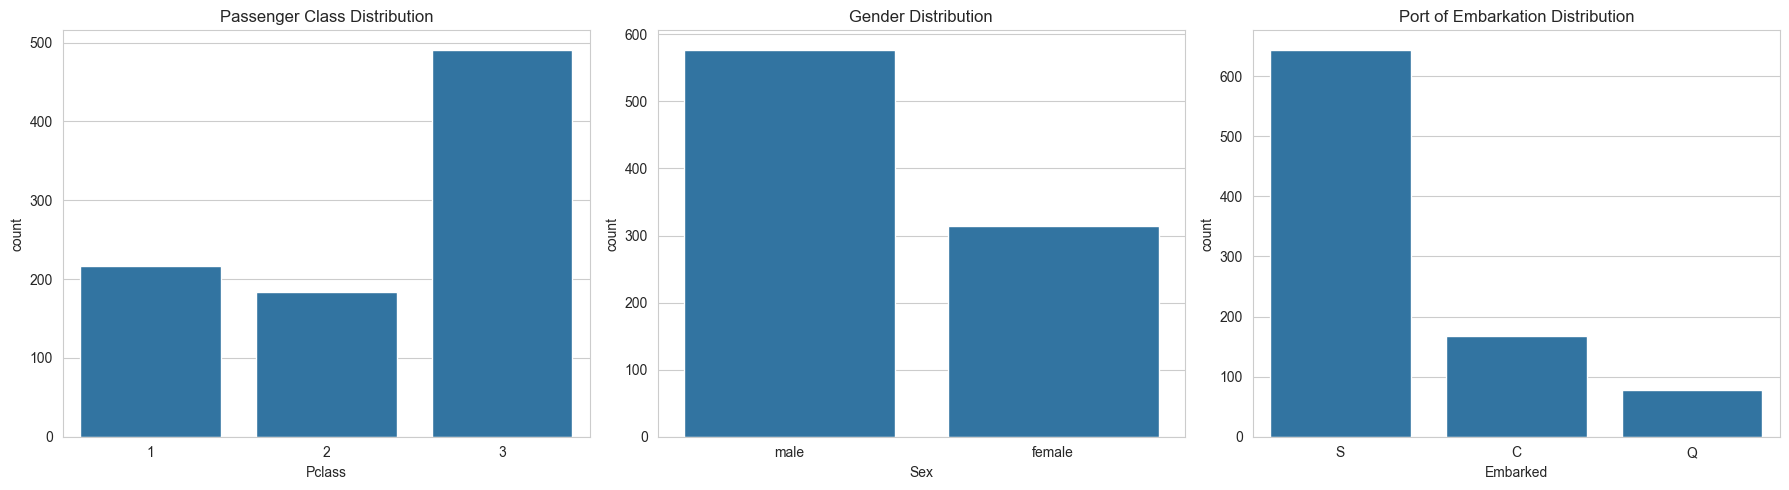

In [36]:
fig, axes =plt.subplots(1,3, figsize=(18,5))

sns.countplot(x='Pclass', data =df_train, ax=axes[0])
axes[0].set_title('Passenger Class Distribution')

sns.countplot(x='Sex', data =df_train, ax=axes[1])
axes[1].set_title('Gender Distribution')

sns.countplot(x='Embarked', data = df_train, ax=axes[2])
axes[2].set_title('Port of Embarkation Distribution')

plt.tight_layout()
plt.show()

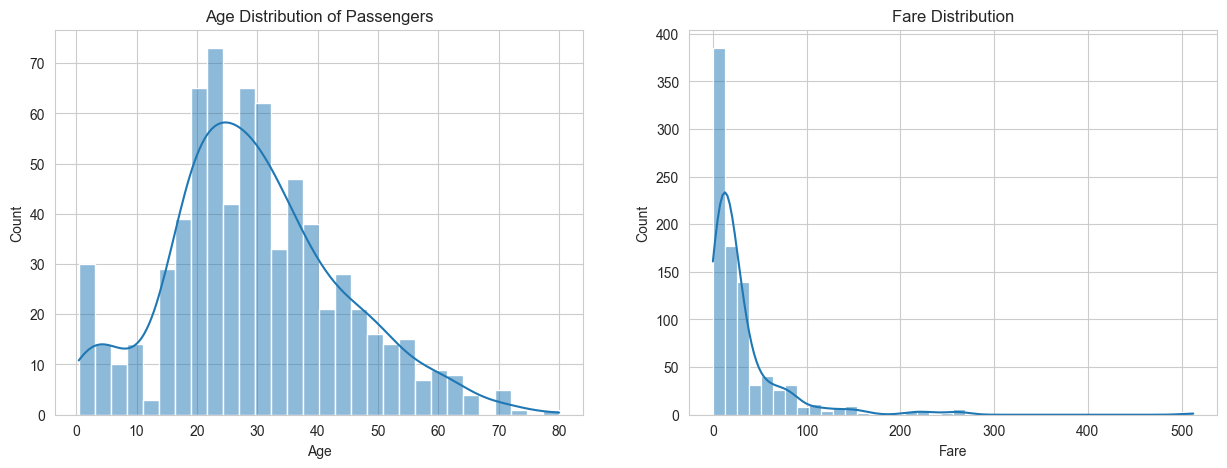

In [37]:
#Create a figure with 2 subplots
fig, axes = plt.subplots(1,2, figsize= (15, 5))

# Plot histogram for Age
sns.histplot(df_train['Age'].dropna(), bins=30, kde= True, ax = axes[0])
axes[0].set_title("Age Distribution of Passengers")

# Plot histogram for Fare
sns.histplot(df_train['Fare'], bins=40, kde=True, ax=axes[1])
axes[1].set_title('Fare Distribution')
plt.show()


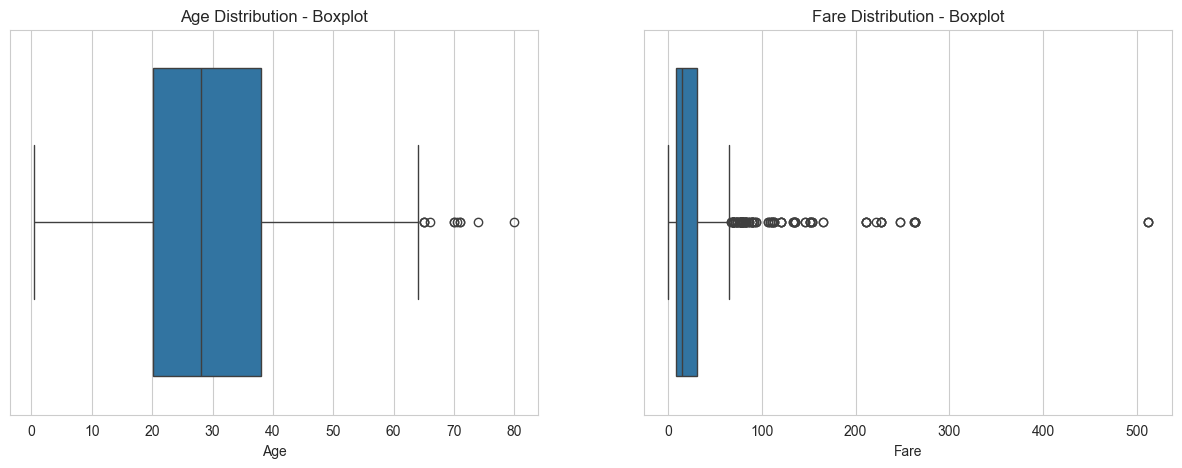

In [38]:
# Create a figure with 2 subplots for boxplots
fig, axes = plt.subplots(1,2, figsize=(15,5))

# Boxplot for Age
sns.boxplot(x=df_train['Age'], ax= axes[0])
axes[0].set_title("Age Distribution - Boxplot")

#Boxplot for Fare
sns.boxplot(x=df_train['Fare'], ax= axes[1])
axes[1].set_title("Fare Distribution - Boxplot")
plt.show()



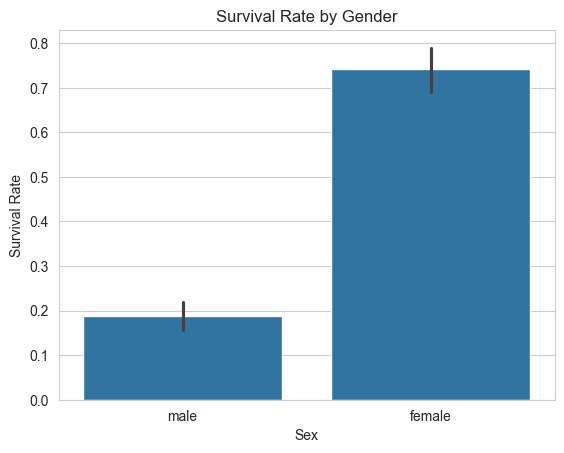

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [39]:
sns.barplot(x='Sex', y = 'Survived', data= df_train)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.show()

#Print the exact numbers
print(df_train.groupby('Sex')['Survived'].mean())

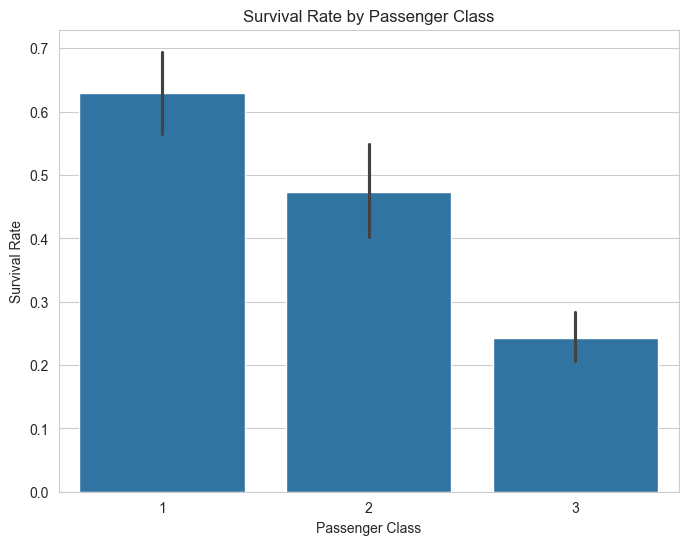

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [40]:
# Bar plot of survival rate by Pclass
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=df_train)

plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

plt.show()

# Print the exact numbers for confirmation
print(df_train.groupby('Pclass')['Survived'].mean())

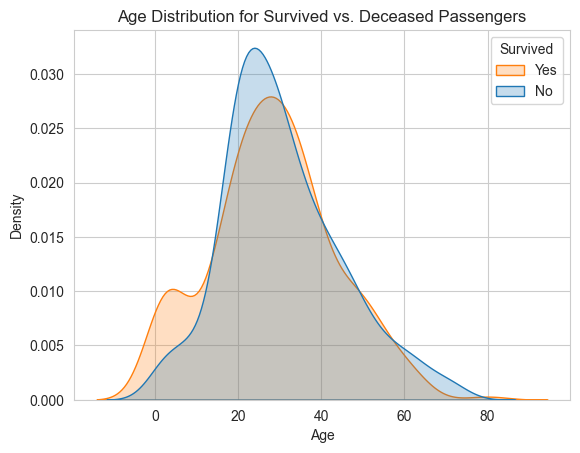

In [41]:
# KDE plot of Age, split by Survival status

sns.kdeplot(data=df_train, x='Age', hue='Survived', fill=True, common_norm=False)
plt.title('Age Distribution for Survived vs. Deceased Passengers')
plt.legend(title='Survived', labels=['Yes', 'No'])
plt.show()

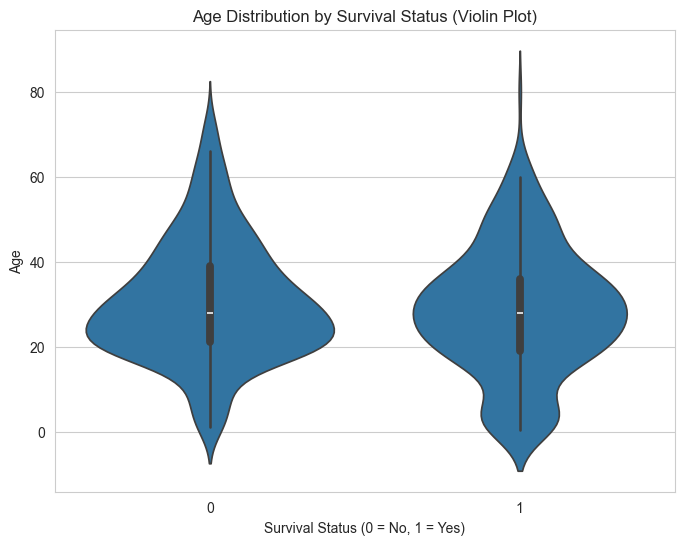

In [42]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Survived', y='Age', data=df_train)

plt.title('Age Distribution by Survival Status (Violin Plot)')
plt.xlabel('Survival Status (0 = No, 1 = Yes)')
plt.ylabel('Age')

plt.show()



In [43]:
#Create a copy of the dataframe to work on
df_processed = df_train.copy()

#Check the current state of missing values
print("Missing values before cleaning:")
print(df_processed.isnull().sum())


Missing values before cleaning:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [44]:
#Find the mode (most frequent value) of the 'Embarked' column
embarked_mode = df_processed['Embarked'].mode()[0]
print(f"The most frequent port of embarkation is: {embarked_mode}")

#fill the missing values with the mode
df_processed['Embarked'].fillna(embarked_mode, inplace = True)

print(f"\nMissing 'Embarked' values after filling:{df_processed['Embarked'].isnull().sum()}")


The most frequent port of embarkation is: S

Missing 'Embarked' values after filling:0


C:\Users\Krm\AppData\Local\Temp\ipykernel_17644\922886073.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed['Embarked'].fillna(embarked_mode, inplace = True)


In [45]:
#Create the 'Has_Cabin' feature
df_processed['Has_Cabin'] = df_processed['Cabin'].notnull().astype(int)

#Drop the original 'Cabin' column as it's  no longer needed
df_processed.drop('Cabin', axis=1, inplace=True)

print("Created 'Has_Cabin' feature and dropped 'Cabin' column.")
df_processed.head()


Created 'Has_Cabin' feature and dropped 'Cabin' column.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [46]:
#Let's check the median age for each passenger class
print(df_processed.groupby('Pclass')['Age'].median())

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64


In [49]:
#Calculate the median age for each combination of Pclass and Sex
median_age_by_group = df_processed.groupby(['Pclass', 'Sex'])['Age'].transform('median')

#Fill the missing 'Age' values using this new series
df_processed['Age']= df_processed['Age'].fillna(median_age_by_group)
print(f"Missing 'Age' values after intelligent imputation: {df_processed['Age'].isnull().sum()}")


Missing 'Age' values after intelligent imputation: 0


In [51]:
#final check for any remaning null values
print("Missing values after all cleaning steps:")
print(df_processed.isnull().sum()) 

Missing values after all cleaning steps:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64


In [53]:
#Create FamilySize feature
df_processed['FamilySize'] = df_processed['SibSp'] + df_processed['Parch'] + 1

#Create IsAlone feature
df_processed['IsAlone'] = 0
df_processed.loc[df_processed['FamilySize'] == 1, 'IsAlone'] = 1

print("Created 'FamilySize' and 'IsAlone' features.")
df_processed[['FamilySize', 'IsAlone']].head()

Created 'FamilySize' and 'IsAlone' features.


,FamilySize,IsAlone
0,2,0
1,2,0
2,1,1
3,2,0
4,1,1


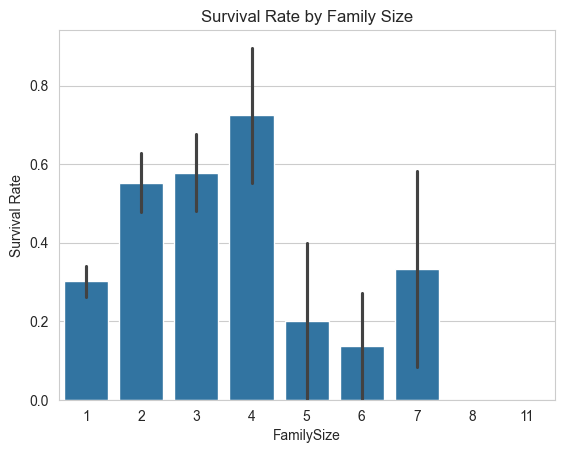

In [54]:
#Quick analysis of the new feature
sns.barplot(x = 'FamilySize', y = 'Survived', data=df_processed)
plt.title('Survival Rate by Family Size')
plt.ylabel('Survival Rate')
plt.show()

In [56]:
# Extract titles from the 'Name' column
df_processed['Title'] = df_processed['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

print("Titles extracted successfully.")
df_processed['Title'].value_counts()

Titles extracted successfully.


<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Krm\AppData\Local\Temp\ipykernel_17644\3416172993.py:2: SyntaxWarning: invalid escape sequence '\.'
  df_processed['Title'] = df_processed['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

In [57]:
# Consolidate titles into a smaller number of categories
df_processed['Title'] = df_processed['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

df_processed['Title'] = df_processed['Title'].replace('Mlle', 'Miss')
df_processed['Title'] = df_processed['Title'].replace('Ms', 'Miss')
df_processed['Title'] = df_processed['Title'].replace('Mme', 'Mrs')

print("Titles consolidated.")
df_processed['Title'].value_counts()

Titles consolidated.


Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64

In [58]:
#Drop columns that are no longer useful or have been remplaced by new features
df_final = df_processed.drop(['PassengerId','Name', 'Ticket', 'SibSp', 'Parch'], axis =1)
print("Redundant columns dropped.")
df_final.head()

Redundant columns dropped.


,Survived,Pclass,Sex,Age,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,0,3,male,22.0,7.2500,S,0,2,0,Mr
1,1,1,female,38.0,71.2833,C,1,2,0,Mrs
2,1,3,female,26.0,7.9250,S,0,1,1,Miss
3,1,1,female,35.0,53.1000,S,1,2,0,Mrs
4,0,3,male,35.0,8.0500,S,0,1,1,Mr


In [59]:
#Convert categorial variables into dumy/indicator variables
df_final= pd.get_dummies(df_final, columns=['Sex', 'Embarked', 'Title'], drop_first= True)

print("Categorical features encoded.")
df_final.head()

Categorical features encoded.


,Survived,Pclass,Age,Fare,Has_Cabin,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,22.0,7.2500,0,2,0,True,False,True,False,True,False,False
1,1,1,38.0,71.2833,1,2,0,False,False,False,False,False,True,False
2,1,3,26.0,7.9250,0,1,1,False,False,True,True,False,False,False
3,1,1,35.0,53.1000,1,2,0,False,False,True,False,False,True,False
4,0,3,35.0,8.0500,0,1,1,True,False,True,False,True,False,False


In [62]:
#Phase 5: Modeling
#'y' is the column we want to predict : 'Survived'
y = df_final['Survived']

#'X' is all the other column that will be used as input features for the model
X = df_final.drop('Survived', axis = 1)

print("Shape of features matrix X:", X.shape)
print("Shape of terget veector y: ", y.shape)

X.head()


Shape of features matrix X: (891, 13)
Shape of terget veector y:  (891,)


,Pclass,Age,Fare,Has_Cabin,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,3,22.0,7.2500,0,2,0,True,False,True,False,True,False,False
1,1,38.0,71.2833,1,2,0,False,False,False,False,False,True,False
2,3,26.0,7.9250,0,1,1,False,False,True,True,False,False,False
3,1,35.0,53.1000,1,2,0,False,False,True,False,False,True,False
4,3,35.0,8.0500,0,1,1,True,False,True,False,True,False,False


In [66]:
from sklearn.model_selection import train_test_split

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state =42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (712, 13)
X_test shape: (179, 13)
y_train shape: (712,)
y_test shape: (179,)


In [67]:
from sklearn.ensemble import RandomForestClassifier

# Create (instantiate) the model
# n_estimators is the number of trees in the forest. 100 is a good default.
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
# This is where the model 'learns' the patterns.
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


In [68]:
#Use the trained model to make predictions on the test set
predictions = model.predict(X_test)

print("Predictions made on the test set.")

#Let's look at the first 20 predictions
print("First 20 predictions:", predictions[:20])

#And the first 20 actuel values
print("First 20 actuel labels:", y_test.values[:20])


Predictions made on the test set.
First 20 predictions: [1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0]
First 20 actuel labels: [1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0]
